In [1]:
# Optimization
import torch
import matplotlib.pyplot as plt

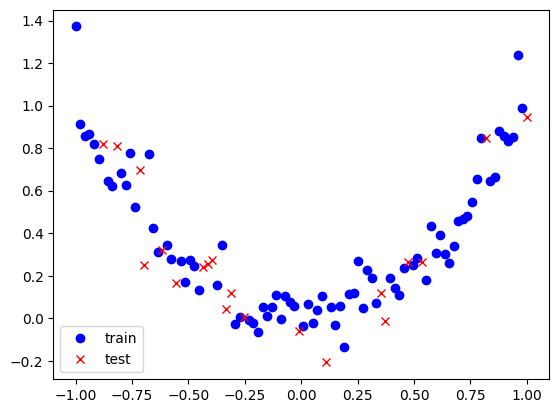

In [18]:
# Create a simple dataset
n_data = 100
n_train = 80
X = torch.linspace(-1,1,n_data).reshape(-1,1)
y = torch.pow(X,2) + 0.1*torch.randn(n_data,1)

# Split data for training and testing
idx = torch.randperm(n_data)
X_train = X[idx[:n_train]]
y_train = y[idx[:n_train]]
X_test = X[idx[n_train:]]
y_test = y[idx[n_train:]]

# plot the data with different marker
plt.plot(X_train, y_train, c='b', marker='o', linestyle='None', label='train')
plt.plot(X_test, y_test, c='r', marker='x', linestyle='None', label='test')
plt.legend()
plt.show()

In [19]:
# Create a linear regression model with 5th polynomial
X_train_poly = torch.cat((torch.ones(n_train,1), X_train, X_train**2, X_train**3, X_train**4, X_train**5), 1)

# Shuffle the data
idx = torch.randperm(n_train)
X_train_poly = X_train_poly[idx]
y_train = y_train[idx]


epoch 0, loss 0.5703567266464233
epoch 10, loss 0.04619681462645531
epoch 20, loss 0.029045725241303444
epoch 30, loss 0.020059041678905487
epoch 40, loss 0.015339707024395466
epoch 50, loss 0.012858523055911064
epoch 60, loss 0.011551954783499241
epoch 70, loss 0.01086205430328846
epoch 80, loss 0.01049605943262577
epoch 90, loss 0.010300332680344582
epoch 100, loss 0.010194229893386364
epoch 110, loss 0.010135401971638203
epoch 120, loss 0.010101608000695705
epoch 130, loss 0.010081145912408829
epoch 140, loss 0.010067857801914215
epoch 150, loss 0.010058491490781307
epoch 160, loss 0.010051322169601917
epoch 170, loss 0.010045429691672325
epoch 180, loss 0.01004031766206026
epoch 190, loss 0.010035712271928787


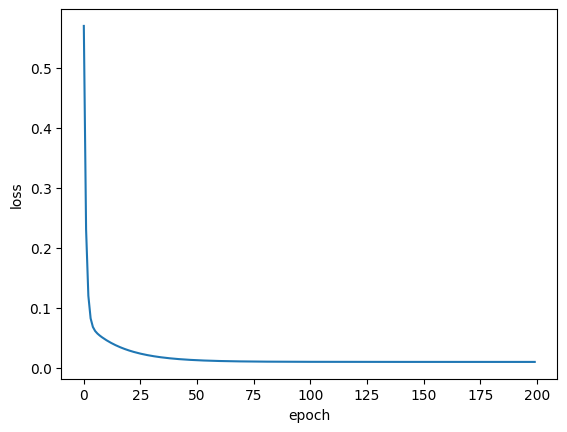

Test loss:  0.01689496636390686


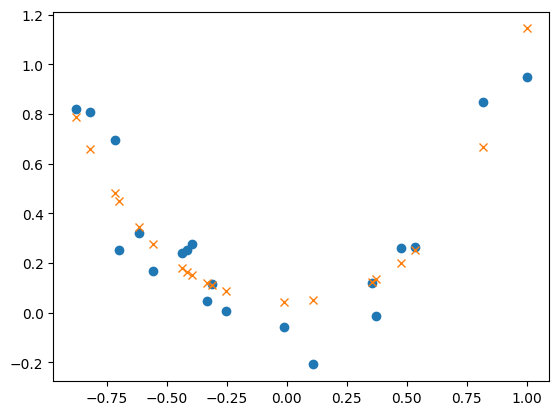

In [40]:
# Gradient descent optimizer where batch size = data size
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# batch size = data size
batch_size = n_train

# Save the loss for plotting
losses = []

# Initialize the model parameters
model[0].weight.data.fill_(0)

# Train the model with batch size
for epoch in range(200):
    for i in range(0, n_train, batch_size):
        # Compute predictions by calling model
        pred_y = model(X_train_poly[i:i+batch_size])
 
        # Compute loss
        loss = criterion(pred_y, y_train[i:i+batch_size])
 
        # Calculate gradients by running the backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Save the loss for plotting
    losses.append(loss.item())
    # Print the loss after every 10 epoch
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

    # Stop the training if the loss is less than 0.01
    if loss.item() < 0.01:
        print('Stopped at epoch {}, loss {}'.format(epoch, loss.item()))
        break


# Plot the loss
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Test the model
y_test_pred = model(torch.cat((torch.ones(n_data-n_train,1), X_test, X_test**2, X_test**3, X_test**4, X_test**5), 1))

# Print the test loss and plot the data
print('Test loss: ', criterion(y_test_pred, y_test).item())
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()

epoch 0, loss 0.0005718002212233841
epoch 10, loss 2.9551132683991455e-05
epoch 20, loss 0.00015988947416190058
epoch 30, loss 0.00027566024800762534
epoch 40, loss 0.00035166702582500875
epoch 50, loss 0.000396058545447886
epoch 60, loss 0.0004201275296509266
epoch 70, loss 0.00043218969949521124
epoch 80, loss 0.00043748202733695507
epoch 90, loss 0.0004390792455524206
epoch 100, loss 0.00043873023241758347
epoch 110, loss 0.0004374106356408447
epoch 120, loss 0.00043565937085077167
epoch 130, loss 0.0004337614227551967
epoch 140, loss 0.00043186231050640345
epoch 150, loss 0.00043004279723390937
epoch 160, loss 0.00042834182386286557
epoch 170, loss 0.00042676518205553293
epoch 180, loss 0.00042531959479674697
epoch 190, loss 0.000423999794293195


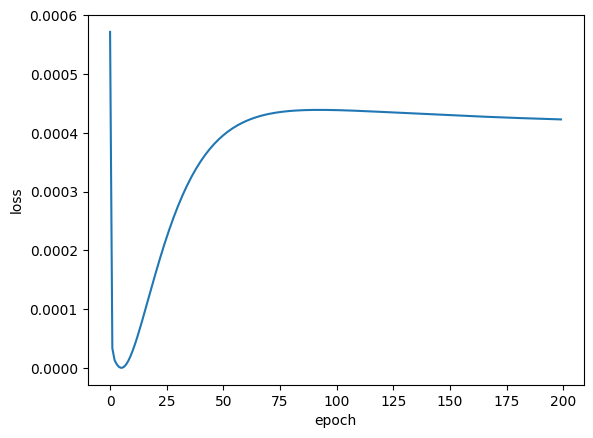

Test loss:  0.018370013684034348


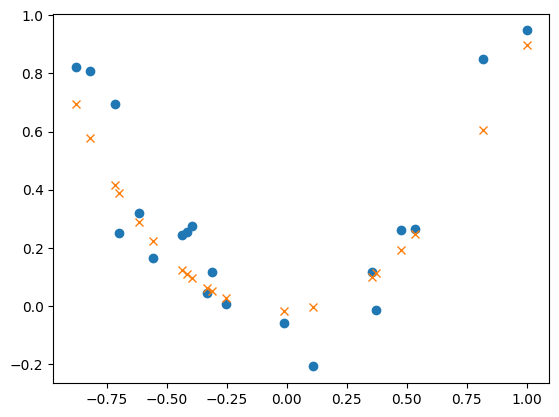

In [39]:
# Stochastic gradient descent optimizer where batch size = 1
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# batch size = 1
batch_size = 1

# Save the loss for plotting
losses = []

# Initialize the model parameters
model[0].weight.data.fill_(0)

# Train the model with batch size
for epoch in range(200):
    for i in range(0, n_train, batch_size):
        # Compute predictions by calling model
        pred_y = model(X_train_poly[i:i+batch_size])
 
        # Compute loss
        loss = criterion(pred_y, y_train[i:i+batch_size])
 
        # Calculate gradients by running the backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Save the loss for plotting
    losses.append(loss.item())
    # Print the loss after every 10 epoch
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))



# Plot the loss
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Test the model
y_test_pred = model(torch.cat((torch.ones(n_data-n_train,1), X_test, X_test**2, X_test**3, X_test**4, X_test**5), 1))

# Print the test loss and plot the data
print('Test loss: ', criterion(y_test_pred, y_test).item())
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()

epoch 0, loss 0.06434331089258194
epoch 10, loss 0.005708890035748482
epoch 20, loss 0.0052648368291556835
epoch 30, loss 0.0052216690964996815
epoch 40, loss 0.005187371280044317
epoch 50, loss 0.005152874626219273
epoch 60, loss 0.00511885154992342
epoch 70, loss 0.0050861043855547905
epoch 80, loss 0.00505508529022336
epoch 90, loss 0.005025978200137615
epoch 100, loss 0.004998816642910242
epoch 110, loss 0.0049735428765416145
epoch 120, loss 0.004950064234435558
epoch 130, loss 0.004928260575979948
epoch 140, loss 0.004908011294901371
epoch 150, loss 0.004889191128313541
epoch 160, loss 0.004871689714491367
epoch 170, loss 0.004855397157371044
epoch 180, loss 0.004840216599404812
epoch 190, loss 0.00482605118304491


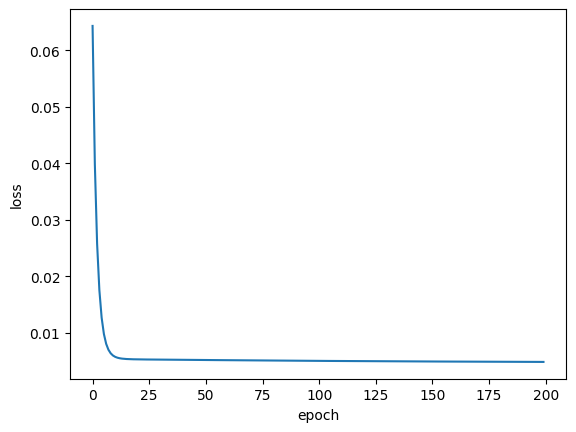

Test loss:  0.01615523360669613


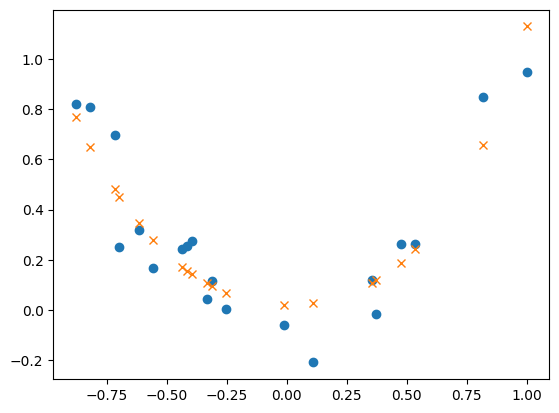

In [41]:
# Mini-batch stochastic gradient descent optimizer where batch size = 10
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# batch size = 1
batch_size = 10

# Save the loss for plotting
losses = []

# Initialize the model parameters
model[0].weight.data.fill_(0)

# Train the model with batch size
for epoch in range(200):
    for i in range(0, n_train, batch_size):
        # Compute predictions by calling model
        pred_y = model(X_train_poly[i:i+batch_size])
 
        # Compute loss
        loss = criterion(pred_y, y_train[i:i+batch_size])
 
        # Calculate gradients by running the backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Save the loss for plotting
    losses.append(loss.item())
    # Print the loss after every 10 epoch
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))


# Plot the loss
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Test the model
y_test_pred = model(torch.cat((torch.ones(n_data-n_train,1), X_test, X_test**2, X_test**3, X_test**4, X_test**5), 1))

# Print the test loss and plot the data
print('Test loss: ', criterion(y_test_pred, y_test).item())
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()

epoch 0, loss 0.016032597050070763
epoch 10, loss 0.005451229400932789
epoch 20, loss 0.005227964837104082
epoch 30, loss 0.005119273439049721
epoch 40, loss 0.0050672306679189205
epoch 50, loss 0.005035643000155687
epoch 60, loss 0.005014410708099604
epoch 70, loss 0.004999183584004641
epoch 80, loss 0.004987754393368959
epoch 90, loss 0.0049789417535066605
epoch 100, loss 0.004972002934664488
epoch 110, loss 0.00496648158878088
epoch 120, loss 0.004962059669196606
epoch 130, loss 0.004958489444106817
epoch 140, loss 0.004955600947141647
epoch 150, loss 0.004953266587108374
epoch 160, loss 0.004951372742652893
epoch 170, loss 0.00494981836527586
epoch 180, loss 0.004948567599058151
epoch 190, loss 0.004947534762322903


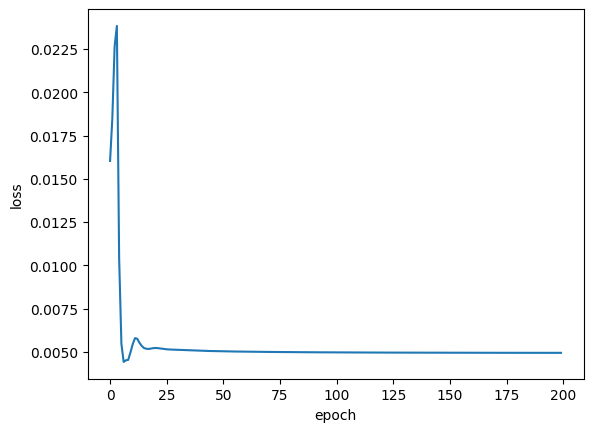

Test loss:  0.01814206875860691


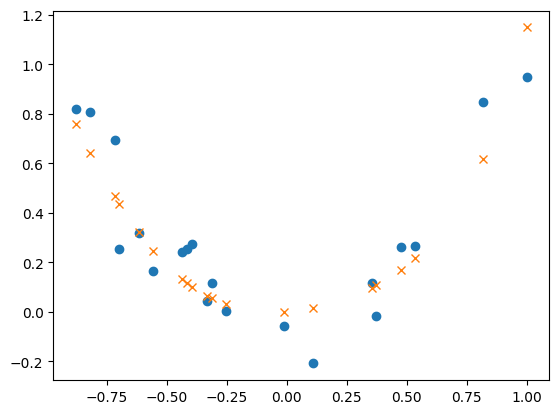

In [42]:
# Mini-batch stochastic gradient descent optimizer where batch size = 10 and momentum = 0.9
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1)
)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

# batch size = 1
batch_size = 10

# Save the loss for plotting
losses = []

# Initialize the model parameters
model[0].weight.data.fill_(0)

# Train the model with batch size
for epoch in range(200):
    for i in range(0, n_train, batch_size):
        # Compute predictions by calling model
        pred_y = model(X_train_poly[i:i+batch_size])
 
        # Compute loss
        loss = criterion(pred_y, y_train[i:i+batch_size])
 
        # Calculate gradients by running the backpropagation
        optimizer.zero_grad()
        loss.backward()

        # Update the model parameters
        optimizer.step()

    # Save the loss for plotting
    losses.append(loss.item())
    # Print the loss after every 10 epoch
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))


# Plot the loss
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Test the model
y_test_pred = model(torch.cat((torch.ones(n_data-n_train,1), X_test, X_test**2, X_test**3, X_test**4, X_test**5), 1))

# Print the test loss and plot the data
print('Test loss: ', criterion(y_test_pred, y_test).item())
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()